<a href="https://www.kaggle.com/code/fangya/bat-acoustic-eda-pca-kmeans-svm?scriptVersionId=93759403" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

🗂 **Packages** 

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import gc
import io
import matplotlib.pyplot as plt
import seaborn as sns
import math
import lightgbm
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold 
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import DBSCAN
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
warnings.simplefilter(action='ignore', category=FutureWarning)
import IPython.display as ipd
%matplotlib inline
#%matplotlib widget
from matplotlib import figure
from ipywidgets import interact
import matplotlib.pyplot as plt
import librosa.display
import librosa
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib as mpl
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
import matplotlib.cm as cm
import matplotlib.patches as mpatche
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
import matplotlib.patches as mpatches
warnings.filterwarnings("ignore")

<h1 id="heading">
    <div style="color:#fdff00;
           display:fill;
           border-radius:5px;
           background-color:#110f11;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
1. 🏹 Introduction
<a class="anchor-link" href="https://www.kaggle.com/fangya/bat-eda-pca-kmeans">¶</a>
</h1>

<img src="https://i.ebayimg.com/images/g/QCEAAOSwr~9dDDpl/s-l400.jpg"  width="300" length="300" align="center">

<h2 style="color:#4a0407;">  Project Outline </h2> 
    
0. Introduction/ Motivation
   - wave sound to classify bat types
1. EDA General
   - Histgram
   - Scatter plot
   - Correlation
   - Frequency
2. Cluster Anaysis
   - KMeans
   - PCA
3. Feature Selection
   - Regular
4. Model 
   - Predict **Low Frequency**   
   
📍 **Fun Fact : Bat is the only mammal that can fly !** - Lexi
    
🙏  Thanks **Dr Alan Hitch** for all the cool Bat knowledge !


<h2 style="color:#4a0407;"> 🪁 Basic Bat Information </h2> 

**Echolocation**:
- Decoding information from echoes
- Alternative calling Strategies

Bat calls can range from *9 kHz* to  *200 kHz*.

Many Bat detectors are limited to *15kHz* to *125 kHz*.


**Motivation and Data Collection**:

This Bat Sonic dataset is collected from Sierra Leone, Africa by Dr Alan Hitch and his research team.
Dr. Alan Hitch worked on building the automatic claasifier for bat species in North America, especially CA area to learn more about Bat Ecology. Now, he is working on collecting the Bat data in Africa (Sierra Leone), and South Asia (Combodia). They would like to investigate the country/history of bat habituals, such as:

1. What kind of bats in which area ?
2. What are the habitat patterns for various bat types?
3. Is there season effect for bat behavior pattern (Wet season/ Dry season)?

<img src="https://cdn.britannica.com/80/5080-050-94EB5392/Sierra-Leone-boundaries-map-cities-locator.jpg"  width="300" length="300" align="center">

**Bats are important**
Bats eats many forests pests!

**Bats are in danger**
In US, 40% of bats are endangered or considered at a risk, we should protect bats!



**Pallid Bat**

Pallid bats are found in dry, open habitat. They use crevices in cliffs, caves, mines, or bridges (and sometimes, buildings) for day, night, or maternity roosts, or hibernacula. Canada
The frequency representation has 2 peaks centered at approximately 15 and 40 kHz

📌 Note: Bat has kHz, but the python graph shows Hz

<img src="https://oregonconservationstrategy.org/media/pallid-bat-Michael-Durham.jpg"  width="300" length="300" align="center">


In [2]:
ipd.Audio('../input/bsound/pallid.mp3')

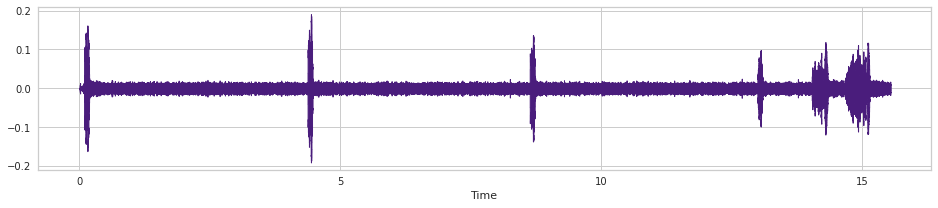

In [3]:
x, sr = librosa.load('../input/bsound/pallid.mp3')
plt.figure(figsize=(16, 3))
librosa.display.waveshow(x, sr=sr,color="#4a1d7c")

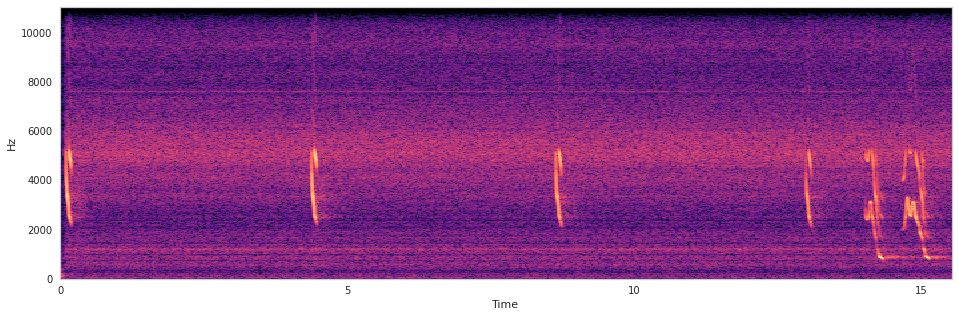

In [4]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(16, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

**Big Brown Bat**

The big brown bat has a large body (two and one-half to three inches long) and long forearms. The body fur is brown, and it has brown-black wings and ears. A broad, round tragus is present in the ear. 
The big brown bat may be found statewide in Illinois.
The big brown bat produces a low-frequency call (20-35kHz)

<img src="https://www2.illinois.gov/dnr/education/WAImages/WAWMBigBrownBat-MD.jpg"  width="500" length="500" align="center">

In [5]:
ipd.Audio('../input/bsound/bigbrown.mp3')

Text(30.375, 0.5, 'Big Brown Bat')

<Figure size 1152x216 with 0 Axes>

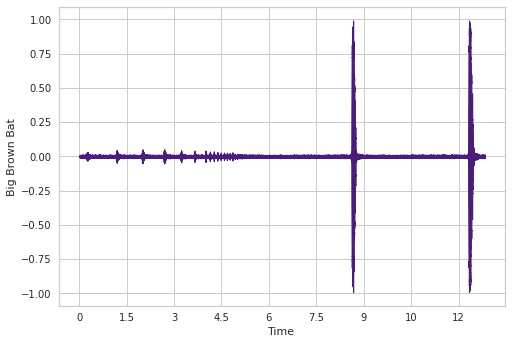

In [6]:
x, sr = librosa.load('../input/bsound/bigbrown.mp3')
plt.figure(figsize=(16, 3))
ax = plt.subplots(nrows=1)
librosa.display.waveshow(x, sr=sr,ax=ax[1],color="#4a1d7c")
ax[1].set_ylabel("Big Brown Bat")

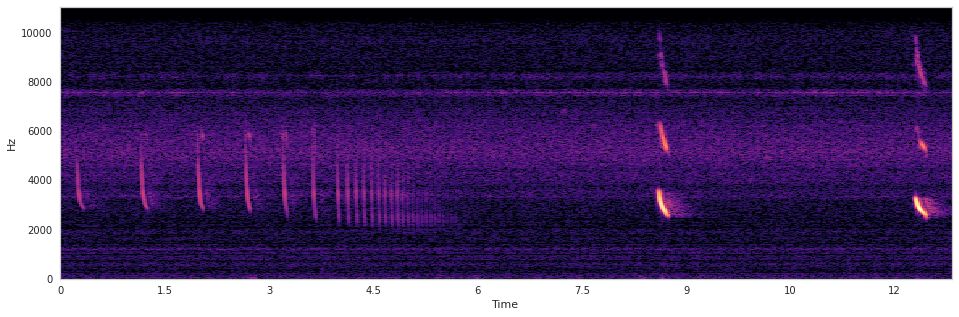

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(16, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')


<h2 style="color:#4a0407;">  Color Scheme </h2> 
   

In [8]:
bat_palette=["#110f11","#840b06","#bc8c4f","#4a0407"]
sns.set_palette(palette=bat_palette)
sns.color_palette(bat_palette)

[(0.06666666666666667, 0.058823529411764705, 0.06666666666666667),
 (0.5176470588235295, 0.043137254901960784, 0.023529411764705882),
 (0.7372549019607844, 0.5490196078431373, 0.30980392156862746),
 (0.2901960784313726, 0.01568627450980392, 0.027450980392156862)]

<h2 style="color:#4a0407;">  Dataset Overview </h2> 

<img src="https://mikemigas.com/wp-content/uploads/2017/05/soundwave_article_1.jpg" width="400" length="400" align="center">

In [9]:
bat = pd.read_csv('../input/batinfo/sierral2021_p_v30.0.txt', sep="\t",engine ='python')
bat=bat.drop(columns=["Path","Filename","Preemphasis","Filter"])
bat.head()

,TimeInFile,PrecedingIntrvl,CallsPerSec,CallDuration,Fc,HiFreq,LowFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,...,HiFminusStartF,FcMinusEndF,RelPwr2ndTo1st,RelPwr3rdTo1st,ParentDir,NextDirUp,Version,MinAccpQuality,MaxSegLngth,Max#CallsConsidered
0,6953.0,272.695312,3.772364,10.711670,26.778441,35.836334,26.633671,9.202663,27.596513,59.431295,...,0.0,0.070830,0.000000,0.000000,AcousticData,SierraLeone,30.0,0.8,0.5 sec,16
1,7758.0,41.132812,3.772364,9.429974,23.177672,28.430229,22.949051,5.481178,23.732087,61.629003,...,0.0,0.228621,0.005114,0.000000,AcousticData,SierraLeone,30.0,0.8,0.5 sec,16
2,7425.0,117.812500,3.772364,6.801204,27.513432,34.766815,27.040929,7.725886,27.481803,85.129923,...,0.0,0.460607,0.045811,0.000000,AcousticData,SierraLeone,30.0,0.8,0.5 sec,16
3,7154.0,201.601562,3.772364,9.199148,23.407836,27.577373,23.078543,4.498830,23.861585,60.414461,...,0.0,0.329293,0.271250,0.012847,AcousticData,SierraLeone,30.0,0.8,0.5 sec,16
4,6201.0,66.421875,3.772364,5.588402,24.112716,35.416642,23.292559,12.124083,26.843880,62.138127,...,0.0,0.820157,0.050021,0.063903,AcousticData,SierraLeone,30.0,0.8,0.5 sec,16


∿ **Frequency by Category**

In [10]:
batf=bat[["HiFreq","LowFreq"]].dropna()
Freq=batf["HiFreq"]+batf["LowFreq"]
Freq2=Freq/2
batf1=pd.DataFrame (Freq2, columns = ['Freq'])
# Cut Level for Freq
fcat=pd.cut(batf1.Freq, bins=[0,50,75,100,125], 
             labels=["Freq<50", "50<Freq<75" ,"75<Freq<100", "100<Freq<125"])
batf1.insert(1,"Fcat", fcat)

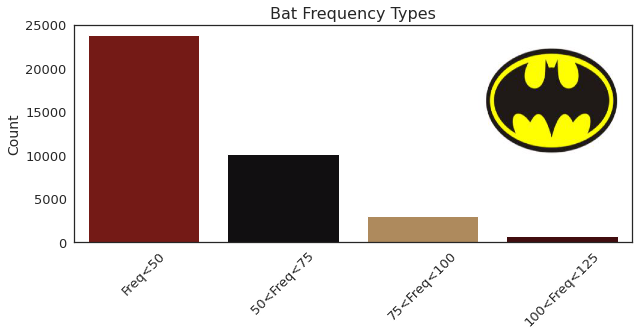

In [11]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
bird = mpimg.imread('../input/bpicture/bat1.JPG')
imagebox = OffsetImage(bird, zoom=0.6)
xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy, frameon=False, pad=1, xybox=(2.9, 16000))

plt.figure(figsize=(10, 4))
sns.set_style("white")
ax = sns.countplot(batf1['Fcat'], palette = ("#840b06","#110f11", "#bc8c4f","#4a0407"))
ax.add_artist(ab)

plt.title("Bat Frequency Types", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

In [12]:
# Exclude Categorical Variables
bat.dtypes
bat1=bat.select_dtypes(exclude=['object',"int64"])

<h2 style="color:#4a0407;">  Variable Description </h2> 

I listed Partial Variables Explanation.

⛳️ **Low Frequency** is an important factor for distingushing bat types

1. **CallDuration**: Duration of the call (msecs). 
2. **Fc**: Characteristic frequency of the call. Determined by finding the point in the final 40% of the call having the lowest slope or exhibiting the end of the main trend of the body of the call (kHz). 

3. **HiFreq**: Highest apparent frequency of the call. 
4. **LowFreq**: Lowest apparent frequency of the call. 
5. **FreqMaxPwr**: The frequency of the maximum amplitude of the call. 
6. **EndF**: Frequency of the end of the call. Typically the same point as the lowest frequency, but different if the call ends with a rise in frequency. 
7. **TotalSlope**: Total slope of the call, calculated from the difference in frequency and time from the point of highest frequency to the point of the characteristic frequency. 
8. **FreqLedge**: Frequency of the ledge, i.e., the most abrupt transition to the most extended flattest slope section of the body of the call preceding the characteristic frequency, also referred to as the "ledge" of the call. 




<h3 style="color:#c96a2f;">  Remove Low Frequency Variables </h3> 

By setting threshold=0.25, we reduced 106 columns to 75 columns

In [13]:
var_thr = VarianceThreshold(threshold = 0.25) #Removing both constant and quasi-constant
var_thr.fit(bat1)
#var_thr.get_support()
concol = [column for column in bat1.columns 
          if column not in bat1.columns[var_thr.get_support()]]

for features in concol:
    print(features)

KnToFcExpAmp
HiFtoUpprKnExp
HiFtoKnExp
HiFtoFcExp
UpprKnToKnExp
KnToFcExp
LdgToFcExp
Amp1stMean
Amp2ndMean
Amp3rdMean
Amp4thMean
LnExpA_StartAmp
AmpStartLn60ExpC
LnExpA_EndAmp
AmpEndLn60ExpC
AmpVariance
AmpMoment
AmpGausR2
PreFc250Residue
PreFc500Residue
PreFc1000Residue
PreFc3000Residue
KneeToFcResidue
Kn-FcCurviness
meanKn-FcCurviness
Kn-FcCurvinessTrndSlp
Quality
RelPwr2ndTo1st
RelPwr3rdTo1st
Version
MinAccpQuality


In [14]:
bat2=bat1.drop(concol,axis=1)
bat2.head()

,TimeInFile,PrecedingIntrvl,CallsPerSec,CallDuration,Fc,HiFreq,LowFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,...,AmpK@start,AmpK@end,AmpKurtosis,AmpSkew,PreFc250,PreFc500,PreFc1000,PreFc3000,HiFminusStartF,FcMinusEndF
0,6953.0,272.695312,3.772364,10.711670,26.778441,35.836334,26.633671,9.202663,27.596513,59.431295,...,9.910485,7.282065,3.503022,-1.222401,0.103145,-0.265615,-0.050175,-0.106458,0.0,0.070830
1,7758.0,41.132812,3.772364,9.429974,23.177672,28.430229,22.949051,5.481178,23.732087,61.629003,...,6.742257,6.355590,3.792238,-1.215589,-0.078999,-0.078460,-0.094174,-0.148433,0.0,0.228621
2,7425.0,117.812500,3.772364,6.801204,27.513432,34.766815,27.040929,7.725886,27.481803,85.129923,...,30.431486,3.528316,2.918867,-1.042943,-0.194906,-0.304921,-0.584471,-0.895985,0.0,0.460607
3,7154.0,201.601562,3.772364,9.199148,23.407836,27.577373,23.078543,4.498830,23.861585,60.414461,...,5.557625,5.108443,3.150252,-1.157727,-0.100123,-0.152660,-0.126990,-0.155527,0.0,0.329293
4,6201.0,66.421875,3.772364,5.588402,24.112716,35.416642,23.292559,12.124083,26.843880,62.138127,...,9.777233,7.088160,3.126972,-1.164494,-1.621131,-1.770073,-1.758724,-1.383611,0.0,0.820157


<h1 id="h2">
    <div style="color:#fdff00;
           display:fill;
           border-radius:5px;
           background-color:#110f11;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
2. 🎧 Bat Info EDA
<a class="anchor-link" href="https://www.kaggle.com/fangya/bat-eda-pca-kmeans">¶</a>
</h1>

<h2 style="color:#4a0407;">  Correlation Plot </h2>

We use Min_MaxScaler to normalize the variables, and use 1% of the data to generate the correlation plot

In [15]:
x = bat2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#Scale Variables
bat3 = pd.DataFrame(x_scaled,columns=bat2.columns)
bat3.head()

,TimeInFile,PrecedingIntrvl,CallsPerSec,CallDuration,Fc,HiFreq,LowFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,...,AmpK@start,AmpK@end,AmpKurtosis,AmpSkew,PreFc250,PreFc500,PreFc1000,PreFc3000,HiFminusStartF,FcMinusEndF
0,0.463719,0.098997,0.035861,0.092966,0.168605,0.220675,0.192673,0.155680,0.173938,0.563558,...,0.251096,0.283179,0.034094,0.627912,0.857408,0.800668,0.769965,0.768967,0.0,0.274994
1,0.517407,0.014933,0.035861,0.079888,0.137621,0.161046,0.156430,0.092599,0.140550,0.584398,...,0.249270,0.281281,0.038282,0.628633,0.855387,0.803495,0.769185,0.768224,0.0,0.278633
2,0.495198,0.042770,0.035861,0.053066,0.174930,0.212064,0.196679,0.130648,0.172947,0.807246,...,0.262923,0.275488,0.025635,0.646903,0.854101,0.800075,0.760498,0.754979,0.0,0.283983
3,0.477124,0.073188,0.035861,0.077533,0.139601,0.154179,0.157704,0.075948,0.141669,0.572881,...,0.248588,0.278725,0.028986,0.634756,0.855153,0.802374,0.768604,0.768098,0.0,0.280955
4,0.413565,0.024113,0.035861,0.040691,0.145667,0.217296,0.159809,0.205199,0.167435,0.589226,...,0.251020,0.282782,0.028648,0.634040,0.838280,0.777948,0.739693,0.746339,0.0,0.292275


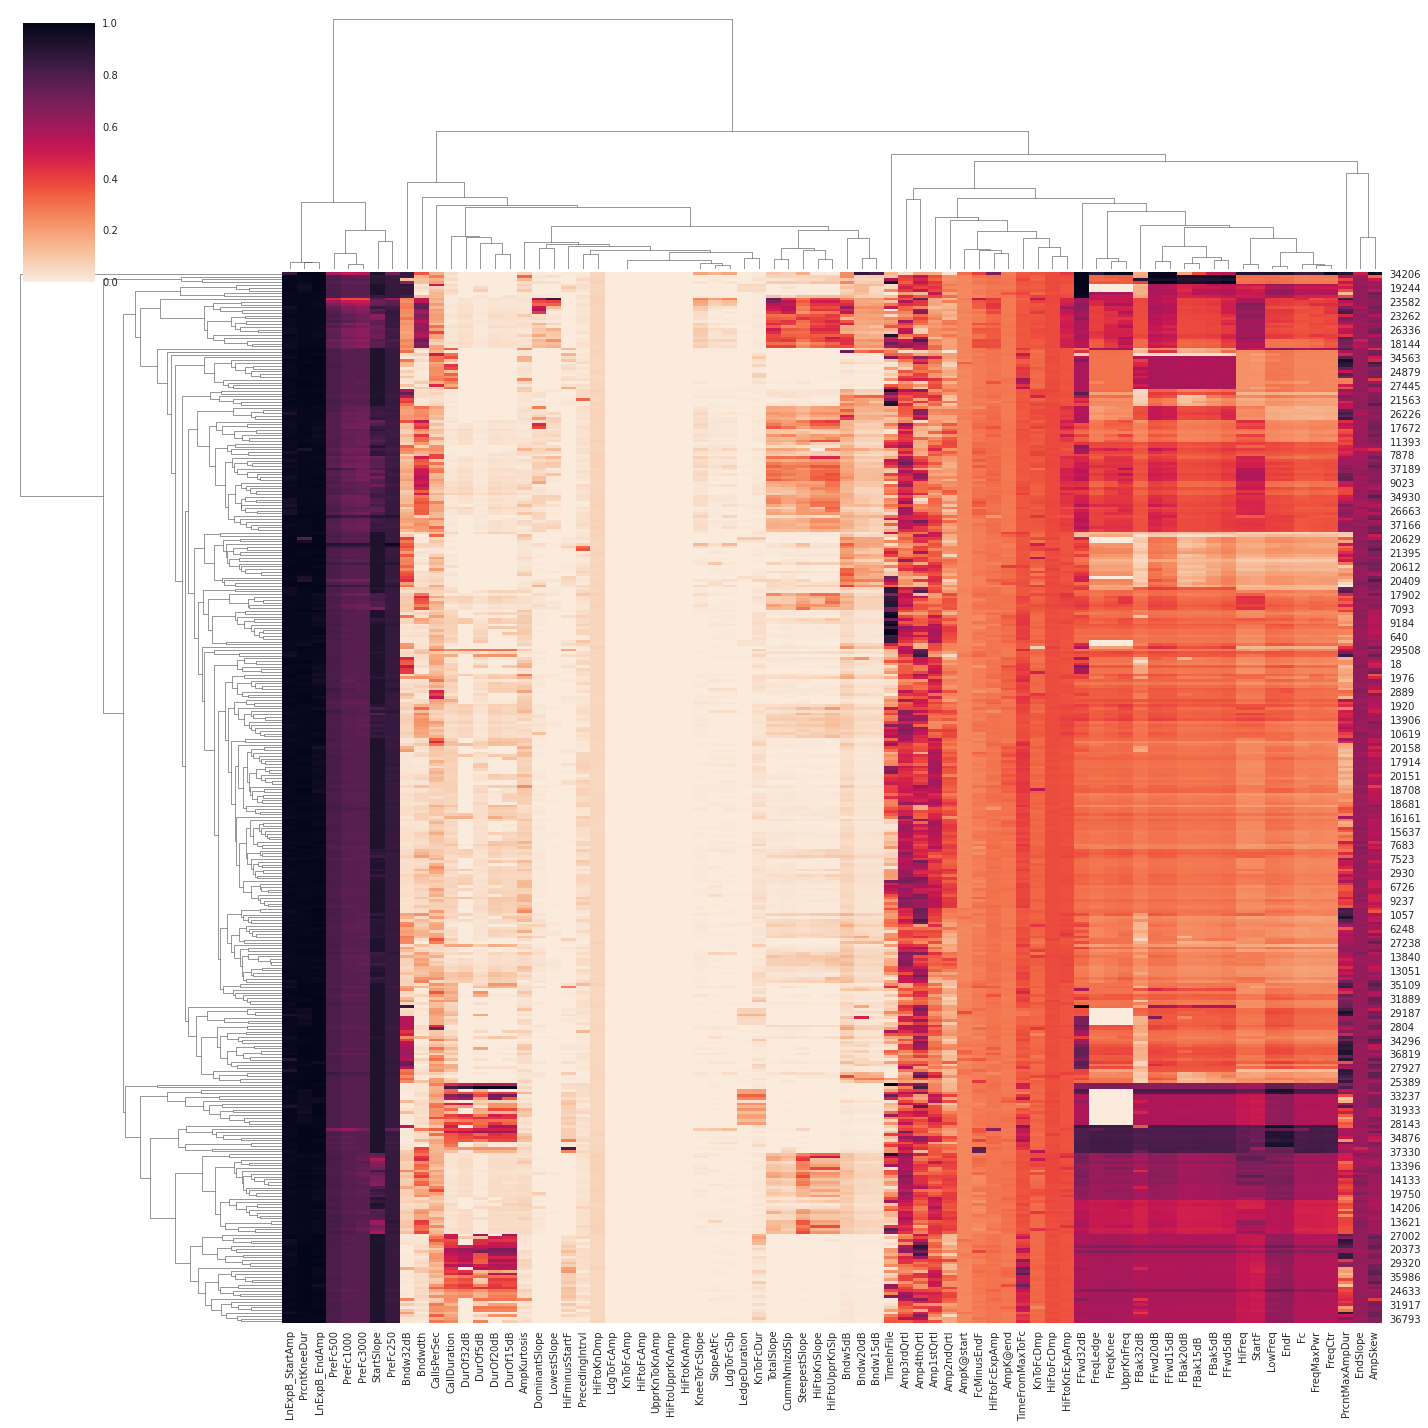

In [16]:
sample_corr=bat3.sample(frac=0.01, random_state=18)
#Correlation Plot
sns.clustermap(sample_corr, figsize=(20, 20), cmap="rocket_r")

<h2 style="color:#4a0407;">  Histogram Plot </h2>

<h3 style="color:#c96a2f;">  Overview </h3>

In [17]:
@interact(cols=bat1.select_dtypes(["int8","float64"]).columns)
def ihis(cols):
    mean=np.int64(bat1[cols].mean())
    median=np.int64(bat1[cols].kurtosis())
    ax=sns.histplot(data=bat,x=cols, color="#4a0407")
    ax.set(title=f'Variable:{cols}|Mean:{mean}|Median:{median}')

interactive(children=(Dropdown(description='cols', options=('TimeInFile', 'PrecedingIntrvl', 'CallsPerSec', 'C…

### High-impact Variable Examples

In [18]:
def histg(var, color ):
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    plt.hist(bat[var],bins=60,density = True, 
         histtype ='bar', color=color)
    plt.title(var)
    plt.show()

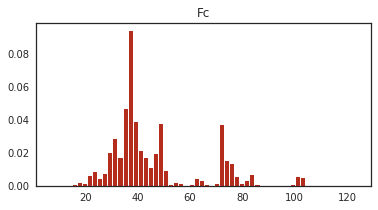

In [19]:
histg("Fc","#b42d1c")

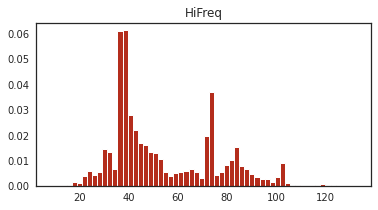

In [20]:
histg("HiFreq","#b42d1c")

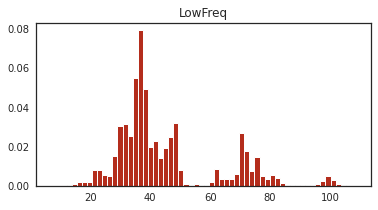

In [21]:
histg("LowFreq","#b42d1c")

### Low-impact Variable Examples

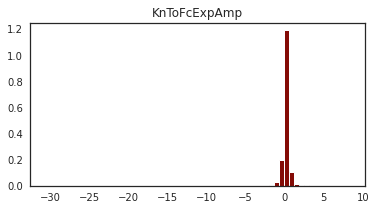

In [22]:
histg("KnToFcExpAmp","#840b06")

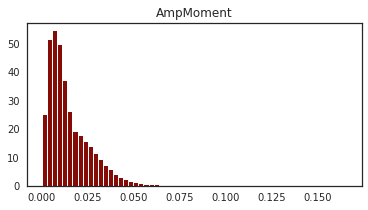

In [23]:
histg("AmpMoment","#840b06")

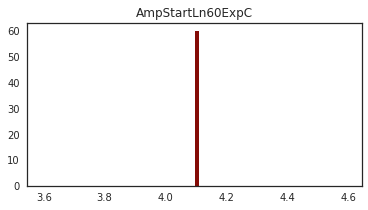

In [24]:
histg("AmpStartLn60ExpC","#840b06")

<h2 style="color:#4a0407;">  Scatter Plot Low Frequency as Important Variables </h2>

In [25]:
@interact(cols=bat3.select_dtypes(["float64"]).columns)
def isca(cols):
    sns.set_style("whitegrid")
    ax=sns.regplot(data=bat3, x=cols, y=bat3["LowFreq"], color="#4a1d7c")
    ax.set(title=f'Variable:{cols}')
   
    

interactive(children=(Dropdown(description='cols', options=('TimeInFile', 'PrecedingIntrvl', 'CallsPerSec', 'C…

<h2 style="color:#4a0407;">  LowFreq vs Important Variables </h2>

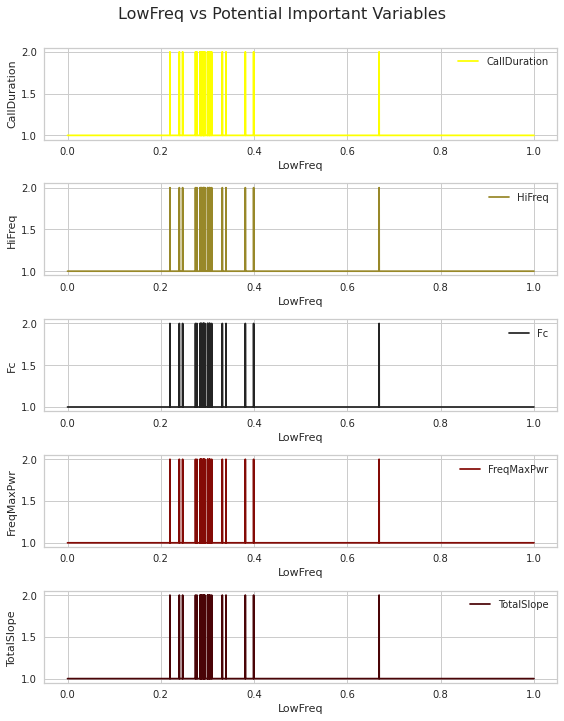

In [26]:
# Plot the FC for top potential features
f= plt.figure(figsize=(8,10))  

def gplot(no, var,color):
    ax=f.add_subplot(no)
    bat3.groupby('LowFreq')[var].nunique().plot(color=color)
    plt.legend()
    plt.xlabel("LowFreq")
    plt.ylabel(var)
    return plt

gplot(no=511, var="CallDuration", color="#fdff00")
gplot(no=512, var="HiFreq", color="#988829")
gplot(no=513, var="Fc", color="#242424")
gplot(no=514, var="FreqMaxPwr", color="#840b06")
gplot(no=515, var="TotalSlope", color="#4a0407")
plt.suptitle('LowFreq vs Potential Important Variables', y=1, size=16) 
plt.tight_layout()
plt.show()

<h1 id="h3">
    <div style="color:#fdff00;
           display:fill;
           border-radius:5px;
           background-color:#110f11;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
3. 🕹Cluster Analysis
<a class="anchor-link" href="https://www.kaggle.com/fangya/bat-eda-pca-kmeans">¶</a>
</h1>

<h2 style="color:#4a0407;">  KMeans </h2>

**Silhouette score**, varying from -1 to 1, is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.

$$S= \frac{b-a}{max(a,b)}$$

**Key Silhouette Cluster Selection Criteria**:

- All clusters above average silhouette scores

- Relative uniform thickness of silhouette plot

<h3 style="color:#c96a2f;">  KMeans Cluster Line Plot </h3>

We the KMeans Cluster Plot shows n=2 or 3 are optimal cluster choices

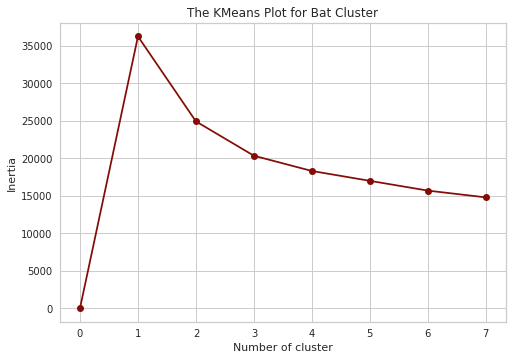

In [27]:
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(bat3)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o',color="#840b06")
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title("The KMeans Plot for Bat Cluster")
plt.show()

<h3 style="color:#c96a2f;">  KMeans Silhouette </h3>

The Silhouette score shows n=2,3,4,5 are good choices for bat clustering. 
Combine with the clustering Line plot, we will choose n=3.

In [28]:
matrix =bat3.values
for n_clusters in range(2,8):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3485402966819466
For n_clusters = 3 The average silhouette_score is : 0.312210336875823
For n_clusters = 4 The average silhouette_score is : 0.32198384284042275
For n_clusters = 5 The average silhouette_score is : 0.3142895776440643
For n_clusters = 6 The average silhouette_score is : 0.20502062090271653
For n_clusters = 7 The average silhouette_score is : 0.21697820944048593


In [29]:
n_clusters = 3
silhouette_avg = -1
while silhouette_avg < 0.31:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.312210336875823


In [30]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    silhouette_avg = silhouette_score(matrix, clusters)
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 100  
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="black", linestyle="--")
        ax1.set_facecolor("white")
        ax1.set_title("The Silhouette Plot for Bat Cluster n=3")

<h3 style="color:#c96a2f;">  The Silhouette Plot </h3>

We can see although n=3 is not a perfect cluster, it still demonstrated decent classification result

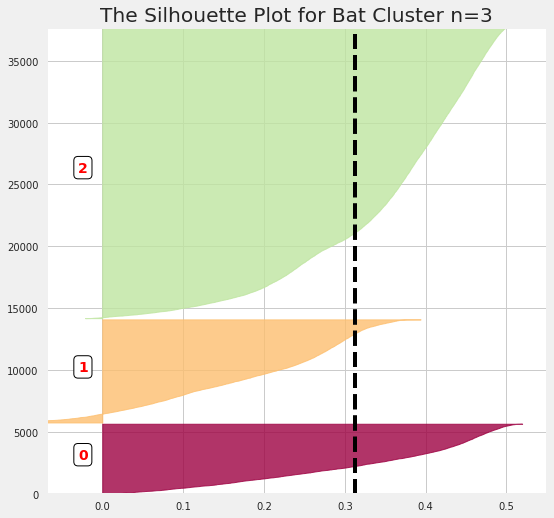

In [31]:
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.55], len(bat3), sample_silhouette_values, clusters)

<h2 style="color:#4a0407;">  PCA </h2>

From the PCA, we can see 8 out 75 variables are good enough to explain over 80% of the variances. 

In [32]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

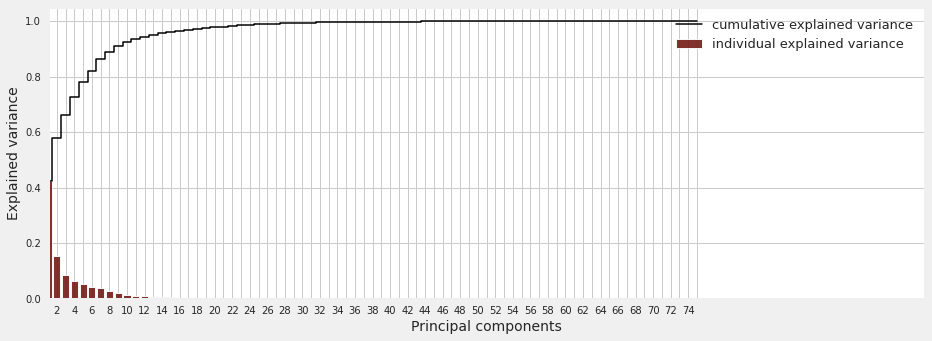

In [33]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',color="#000000",
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.9, color = '#840b06',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])
ax.set_facecolor("white")
ax.grid(True)
plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper right', fontsize = 13);

<h3 style="color:#c96a2f;">  PCA Cluster Representation </h3>

In [34]:
pca = PCA(n_components=10)
matrix_9D = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters)

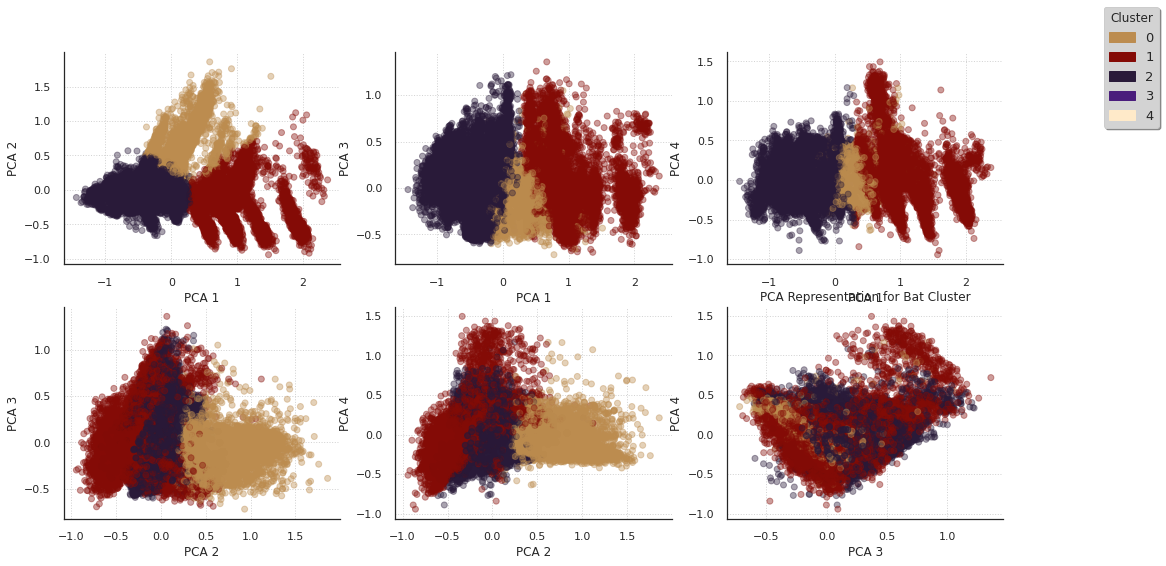

In [35]:
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:"#bc8c4f", 1:'#840b06', 2:'#291a39', 3:'#4a1d7c', 4:'#FFEAC9', 5:'#0FC3FF'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (15,8))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):    
        increment += 1
        ax = fig.add_subplot(2,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(5):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)
plt.title("PCA Representation for Bat Cluster")

plt.show()

<h1 id="h4">
    <div style="color:#fdff00;
           display:fill;
           border-radius:5px;
           background-color:#110f11;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
4. 🔎Feature Importance
<a class="anchor-link" href="https://www.kaggle.com/fangya/bat-eda-pca-kmeans">¶</a>
</h1>

This dataset has NO target variables, I choose **Fc** as the target variable to perform some supervised learning.
Since **Fc** is a good candidate for Bat Type idendification, if we can use the variables to predict **LowFreq**, then we have a good chance to identify the species.

<AxesSubplot:>

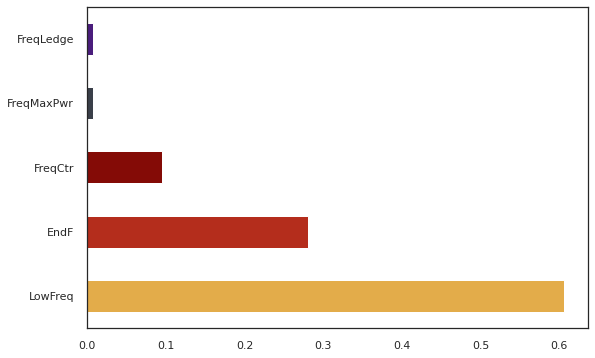

In [36]:
features = bat3.drop(columns=["TimeInFile","Fc"]).dropna()
y = bat3['Fc']
model = RandomForestRegressor()
model.fit(features, y)

(pd.Series(model.feature_importances_, index=features.columns)
   .nlargest(5)
   .plot(kind='barh',color=("#e3ac4a","#b42d1c","#840b06","#3a3f49","#4a1d7c"))) 

<h1 id="h5">
    <div style="color:#fdff00;
           display:fill;
           border-radius:5px;
           background-color:#110f11;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
        5.💯 Model to Predict Low Frequency
<a class="anchor-link" href="https://www.kaggle.com/fangya/bat-eda-pca-kmeans">¶</a>
</h1>
    
<h3 style="color:#c96a2f;">  Train- Test Split </h3>

In [37]:
Y=bat3["LowFreq"].values
X = bat3.drop(columns=["LowFreq"]).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=88)

<h3 style="color:#c96a2f;">  Machine Learning Models <\h3>

In [38]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(Y, predictions):
    mae = mean_absolute_error(Y, predictions)
    mse = mean_squared_error(Y, predictions)
    rmse = np.sqrt(mean_squared_error(Y, predictions))
    r_squared = r2_score(Y, predictions)
    return mae, mse, rmse, r_squared

models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])


<h2 style="color:#4a0407;"> Linear Regression </h2>

I don't know how did we achieve a 99.99% accuracy

In [39]:
model1 = LinearRegression().fit(X, Y)
model1.score(X,Y)

0.9999999999999993

In [40]:
Y_pred = model1.predict(X)
lin = pd.DataFrame({'Actual': Y, 'Predicted': Y_pred.flatten()})
display(lin)


,Actual,Predicted
0,0.192673,0.192673
1,0.156430,0.156430
2,0.196679,0.196679
3,0.157704,0.157704
4,0.159809,0.159809
...,...,...
37664,0.129587,0.129587
37665,0.256958,0.256958
37666,0.259935,0.259935
37667,0.257522,0.257522


In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 2.518260395198192e-09
MSE: 1.9902558280830408e-17
RMSE: 4.461228337670065e-09
R2 Score: 0.9999999999999993
------------------------------
RMSE Cross-Validation: 7.389564513517706e-06


<h2 style="color:#4a0407;"> Support Vector Machine </h2>


In [42]:
from sklearn.svm import SVR
svr = SVR(C=10000)
svr.fit(X_train, Y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.017607428799286975
MSE: 0.0005923142635345828
RMSE: 0.024337507340206038
R2 Score: 0.9803473172402835
------------------------------
RMSE Cross-Validation: 0.02348112759609703


<h2 style="color:#4a0407;"> XGBoost Regressor </h2>

In [43]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.01)
xgb.fit(X_train, Y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.07250271171773157
MSE: 0.006126417806023301
RMSE: 0.07827143671878843
R2 Score: 0.7967286067420105
------------------------------
RMSE Cross-Validation: 0.07786135443968108


<h2 style="color:#4a0407;"> Random Forest Regressor </h2>

In [44]:
random_forest = RandomForestRegressor(n_estimators=10)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.0008062275584034089
MSE: 4.68248572866651e-06
RMSE: 0.0021639052032532548
R2 Score: 0.9998446375307539
------------------------------
RMSE Cross-Validation: 0.004191318628620553


<h3 style="color:#c96a2f;"> Model Compairson </h3>

In [45]:
models.sort_values(by="R2 Score")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
2,XGBRegressor,7.250271e-02,6.126418e-03,7.827144e-02,0.796729,0.077861
1,SVR,1.760743e-02,5.923143e-04,2.433751e-02,0.980347,0.023481
3,RandomForestRegressor,8.062276e-04,4.682486e-06,2.163905e-03,0.999845,0.004191
0,LinearRegression,2.518260e-09,1.990256e-17,4.461228e-09,1.000000,0.000007


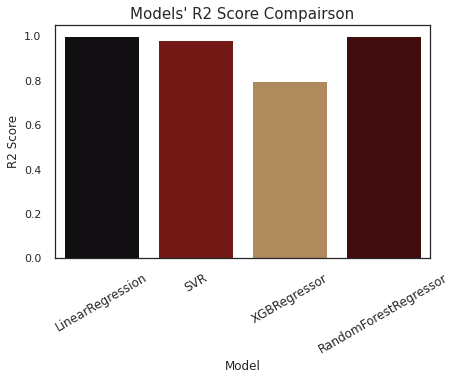

In [46]:
plt.figure(figsize=(6,4))
sns.barplot(x=models["Model"], y=models["R2 Score"], palette=("#110f11","#840b06","#bc8c4f","#4a0407"))
plt.title("Models' R2 Score Compairson", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

<h1 id="h6">
    <div style="color:#fdff00;
           display:fill;
           border-radius:5px;
           background-color:#110f11;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
       6. 🔆Summary:
<a class="anchor-link" href="https://www.kaggle.com/fangya/bat-eda-pca-kmeans">¶</a>
</h1>
    
This is the first time I am doing Unsupervised Learning with an unfamilir topic -Bat Species.
From the analysis we are pretty confident there are at least three distinctive types of Bats. In addition, our result to predict Low Frequency is a really successful try.
  
<h2 style="color:#4a0407;"> Future Work </h2>  
    
In reality, there are about at least 50 Bat species in **Sierra Leone**, the Bat Detector should be able to collect at least 20 of them.
There are should be at least 70 to 80 different Bat in Combodia. 
  <br>
Next step, we could use some of the known species as the reference types to train our model for bat auto- classifier. Since there are certain types of bats share the same behaviors, we will trick our model around to seperate them.
    
> The easy ones are easy, the challenge is what we can do for the trouble gropus - Alan Hitch    
  
    
Personally, It would be fun to apply Fourier Transformation the frequency and harmonics to invesigate a little more about the sound for me!
    <br>
    I never had any interesction with bat except Batman movies in my life, I thought this is a really neat project!
    <br>
    
**Don't judge a bat by its look, they eat pests! Should have our Respect!**
    
    
<h2 style="color:#4a0407;"> To be continued... </h2>

    I will update this project around June.2022 when I get updated data..

<h1 id="h7">
    <div style="color:#fdff00;
           display:fill;
           border-radius:5px;
           background-color:#110f11;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
       7. 📒 Reference:
<a class="anchor-link" href="https://www.kaggle.com/fangya/bat-eda-pca-kmeans">¶</a>
</h1>
    
[1] Tongtian Fan

[2] https://musicinformationretrieval.com/ipython_audio.html

[3] https://www.nps.gov/subjects/bats/echolocation.htm

[4] https://www.kaggle.com/code/andradaolteanu/birdcall-recognition-eda-and-audio-fe

[5] https://oregonconservationstrategy.org/strategy-species/pallid-bat/

[6] https://www2.illinois.gov/dnr/education/Pages/WAWMBigBrownBat.aspx

[7] https://garg-shelvi.medium.com/

[8] https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example

[9] https://www.kaggle.com/code/fabiendaniel/customer-segmentation

[10] https://www.kaggle.com/code/emrearslan123/house-price-prediction

**Special Thanks for Dr Alan Hitch, Teray J, Kallol K!**